In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  

In [2]:
df = pd.read_csv('/Users/siddhant/Project2/Bank_functions/data/raw/loan.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### UNIVERIATE ANALYSIS

In [9]:
skewness = df.skew().round(2)
kurtosis = df.kurtosis().round(2)

statistical_df = pd.DataFrame({'Skew': skewness, 'Kurtosis': kurtosis})

In [10]:
statistical_df

,Skew,Kurtosis
ID,0.00,-1.20
Age,-0.03,-1.15
Experience,-0.03,-1.12
Income,0.84,-0.04
ZIP Code,-12.50,486.20
Family,0.16,-1.40
CCAvg,1.60,2.65
Education,0.23,-1.55
Mortgage,2.10,4.76
Personal Loan,2.74,5.53


#### Column - Age

In [11]:
df['Age'].describe()

count    5000.000000
mean       45.338400
std        11.463166
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

#### OBSERVATIONS
1. The average age is 45. Since the mean and median are almost the same, the data isnt skewed.
2. The std deviation of 11 tells the variation in the data is high

<Axes: ylabel='Age'>

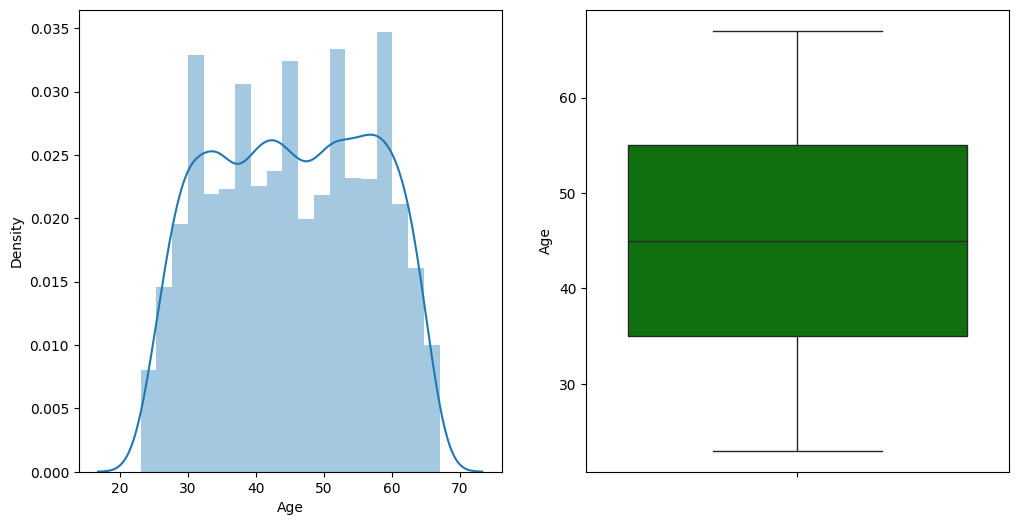

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['Age'], kde=True, ax=ax[0])
sns.boxplot(df['Age'], ax=ax[1], color='green')

In [13]:
'''ITS A MULTIMODAL DISTRIBUTION AND THERE ARE NO OUTLIERS'''

'ITS A MULTIMODAL DISTRIBUTION AND THERE ARE NO OUTLIERS'

In [14]:
df.drop(columns='ID', inplace=True, axis=1)

In [15]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Column - Experience

In [16]:
df['Experience'].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### OBSERVATIONS
1. The average experience is 20 years.
2. Min experience is negative. Experience cannot be negative. Lets further investigate it

In [17]:
df[df['Experience'] < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

In [18]:
'''Looks like a data error, so instead of dropping these values we'll change these values to positive values to preserve the data.'''
df['Experience'] = df['Experience'].replace({-1:1, -2:2, -3:3})

In [19]:
df[df['Experience'] < 0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<Axes: ylabel='Experience'>

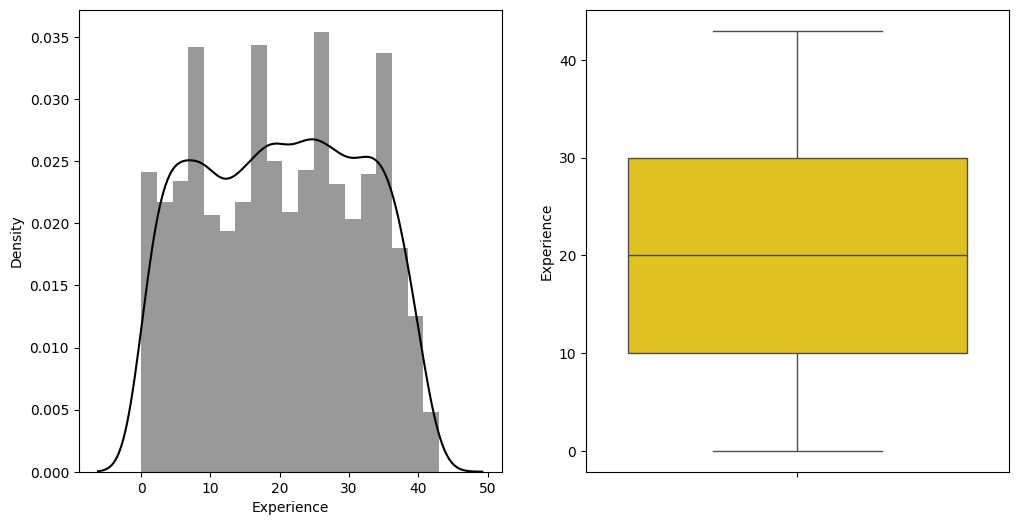

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['Experience'], kde=True, ax=ax[0], color='black')
sns.boxplot(df['Experience'], ax=ax[1], color='gold')

In [21]:
'''ITS A MULTIMODAL DISTRIBUTION AND THERE ARE NO OUTLIERS'''

'ITS A MULTIMODAL DISTRIBUTION AND THERE ARE NO OUTLIERS'

In [22]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Column - Income

In [23]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

### OBSERVATIONS
1. The income is centered around 64 thousand.
2. The mean is greter than median suggesting the distribution is right skewed with presence of outliers

In [24]:
statistical_df

,Skew,Kurtosis
ID,0.00,-1.20
Age,-0.03,-1.15
Experience,-0.03,-1.12
Income,0.84,-0.04
ZIP Code,-12.50,486.20
Family,0.16,-1.40
CCAvg,1.60,2.65
Education,0.23,-1.55
Mortgage,2.10,4.76
Personal Loan,2.74,5.53


<Axes: ylabel='Income'>

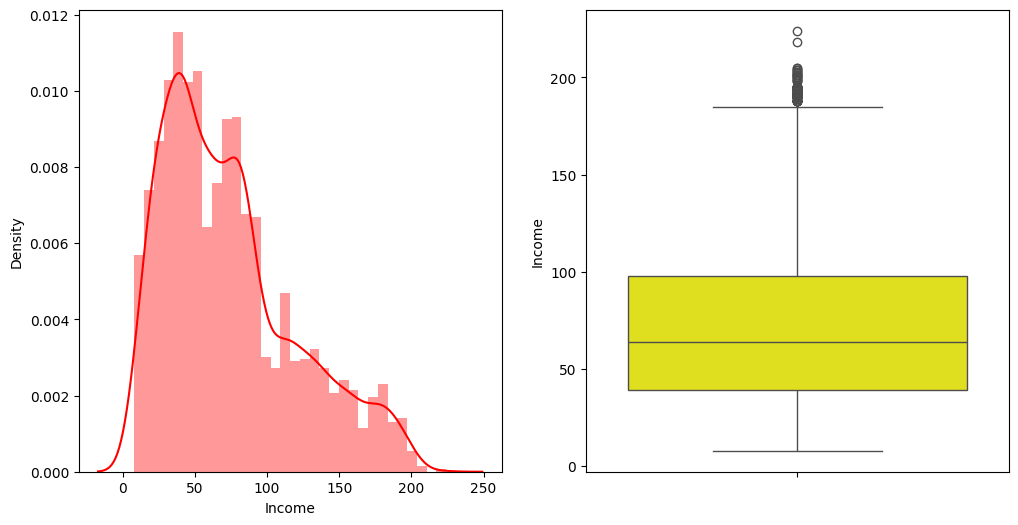

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['Income'], kde=True, ax=ax[0], color='red')
sns.boxplot(df['Income'], ax=ax[1], color='yellow')

In [26]:
df[df['Income'] > 150]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0
18,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
24,36,11,152,95521,2,3.90,1,159,0,0,0,0,1
27,46,20,158,90064,1,2.40,1,0,0,0,0,1,1
47,37,12,194,91380,4,0.20,3,211,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,45,20,201,92120,2,2.80,1,0,0,0,0,1,1
4911,46,22,153,94539,2,7.50,1,0,0,0,0,0,0
4937,33,8,162,94960,1,8.60,1,0,0,0,1,1,1
4981,34,9,195,90266,2,3.00,1,122,0,0,0,1,0


In [27]:
'''These incomes look legitimate and not outliers as such. They justify the other information associated with them.'''

'These incomes look legitimate and not outliers as such. They justify the other information associated with them.'

In [28]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Column - ZIP Code

In [29]:
df['ZIP Code'].describe()

count     5000.000000
mean     93152.503000
std       2121.852197
min       9307.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIP Code, dtype: float64

### OBSERVATIONS
1. The mean is lesser than median suggesting a negative skew.
2. The minimum pincode value is a 4 digit value. Lets investigate that further.

<Axes: ylabel='ZIP Code'>

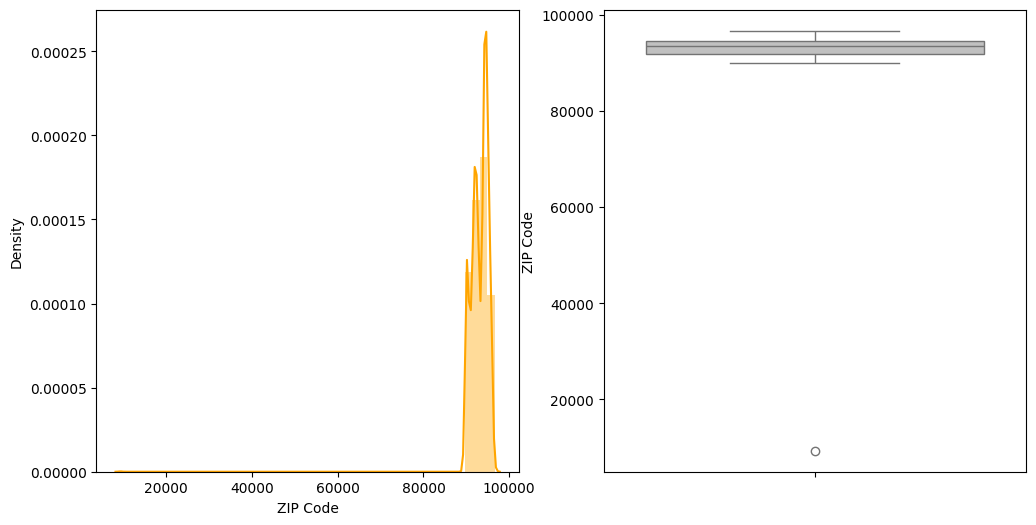

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['ZIP Code'], kde=True, ax=ax[0], color='orange')
sns.boxplot(df['ZIP Code'], ax=ax[1], color='silver')

In [31]:
df[df['ZIP Code'] < 20000]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [32]:
'''Since this is the only outler we have in this feature, we can go ahead and drop it'''
df = df[~(df['ZIP Code'] < 20000)]

<Axes: ylabel='ZIP Code'>

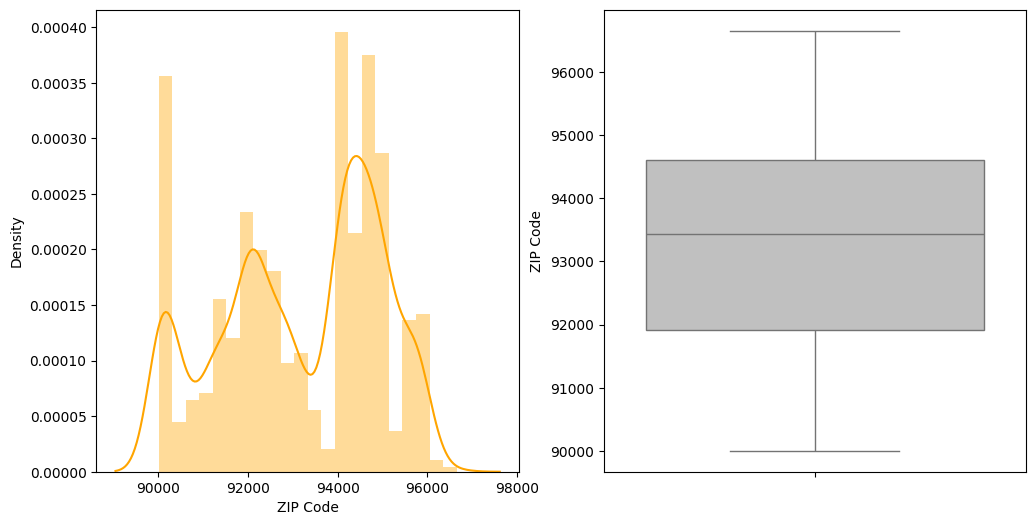

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['ZIP Code'], kde=True, ax=ax[0], color='orange')
sns.boxplot(df['ZIP Code'], ax=ax[1], color='silver')

In [34]:
'''Its a multimodal distribution with clusters mostly around 91000-93000 and 94000-95000'''

'Its a multimodal distribution with clusters mostly around 91000-93000 and 94000-95000'

In [35]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Column - Family

In [36]:
df['Family'].describe()

count    4999.000000
mean        2.396079
std         1.147554
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Family, dtype: float64

<Axes: ylabel='Family'>

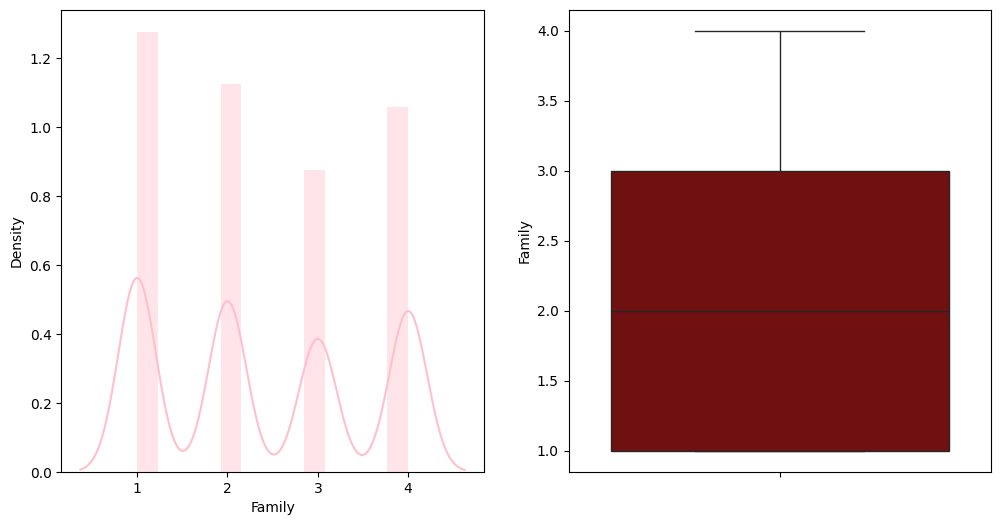

In [37]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['Family'], kde=True, ax=ax[0], color='pink')
sns.boxplot(df['Family'], ax=ax[1], color='maroon')

In [38]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Column - CCGAvg

In [39]:
'''This is average monthly soendiing in credit card. However we have Income given as annually, so lets convert credit card average spending
anually so that both the features would have the same unit'''
df['CCAvg'] = df['CCAvg'] * 12

In [40]:
df['CCAvg'].describe()

count    4999.000000
mean       23.258468
std        20.972776
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: CCAvg, dtype: float64

### OBSERVATIONS
1. The mean is greter than the median suggesting a positive skew.
2. The annual spending is mostly cenetered around 18k

<Axes: ylabel='CCAvg'>

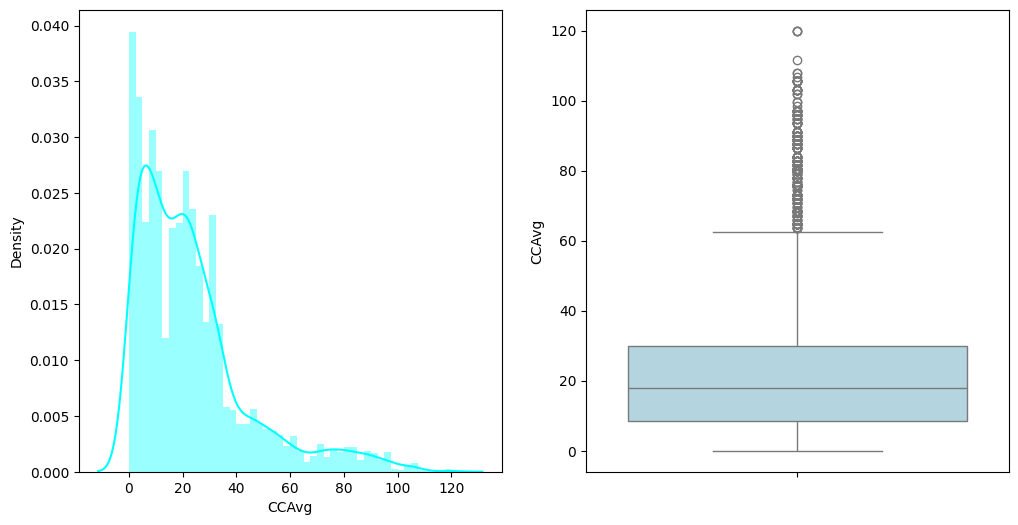

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['CCAvg'], kde=True, ax=ax[0], color='aqua')
sns.boxplot(df['CCAvg'], ax=ax[1], color='lightblue')

In [42]:
df[df['CCAvg'] > 100]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,34,9,180,93023,1,106.8,3,0,1,0,0,0,0
614,37,12,180,90034,1,103.2,1,0,0,0,0,1,1
787,45,15,202,91380,3,120.0,3,0,1,0,0,0,0
881,44,19,154,92116,2,105.6,1,0,0,0,0,1,0
917,45,20,200,90405,2,105.6,1,0,0,0,0,1,1
1277,45,20,194,92110,2,105.6,1,428,0,0,0,0,0
1339,52,25,180,94545,2,108.0,2,297,1,0,0,1,0
1354,35,10,179,91942,1,103.2,1,357,0,0,0,0,0
1797,35,10,143,91365,1,103.2,1,0,0,0,0,1,1
2041,45,20,180,95403,3,102.0,2,535,1,0,0,0,0


In [43]:
df[df['CCAvg'] > 100]['CCAvg'].mean()

106.7076923076923

In [44]:
df[df['CCAvg'] > 100]['Income'].mean()

184.76923076923077

In [45]:
'''These values dont look any alarming. Although avg the annual credit card expense is above 100k, the avg annual income also strongly
sits at 184k'''

'These values dont look any alarming. Although avg the annual credit card expense is above 100k, the avg annual income also strongly\nsits at 184k'

In [46]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


#### Column - Mortgage

In [47]:
df['Mortgage'].describe()

count    4999.000000
mean       56.510102
std       101.720837
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

### OBSERVATIONS
1. Clearly we see there are huge number of outliers.
2. The variation in values is also high.

This is expected because very less people would be having some mortgaged property in their name, and the prie of the mortgage will definitely not be in same range depending upon the property and its attributes.

In [48]:
statistical_df.loc['Mortgage']

Skew        2.10
Kurtosis    4.76
Name: Mortgage, dtype: float64

In [49]:
'''Kurtosis is more than 3 which supports the observation of heavy outliers'''

'Kurtosis is more than 3 which supports the observation of heavy outliers'

In [50]:
# CAPPING THE OUTLIERS TO 3 STD DEVS FROM THE MEAN
upper_limit = df['Mortgage'].mean() + 3*df['Mortgage'].std()

In [51]:
df[df['Mortgage'] > upper_limit]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
42,32,7,132,90019,4,13.2,2,412,1,0,0,1,0
59,31,5,188,91320,2,54.0,1,455,0,0,0,0,0
119,32,7,112,94304,1,55.2,1,366,0,0,0,0,0
288,44,19,172,94306,2,51.6,3,391,1,1,1,1,0
303,49,25,195,95605,4,36.0,1,617,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4672,52,26,180,95831,1,20.4,1,550,0,0,0,1,0
4698,48,22,162,94143,3,16.8,1,400,1,0,0,0,0
4812,29,4,184,92126,4,26.4,3,612,1,0,0,1,0
4842,49,23,174,95449,3,55.2,2,590,1,0,0,0,0


In [52]:
print(f'Percentage of outliers: {(df[df["Mortgage"] > upper_limit].shape[0] / df.shape[0]) * 100}%')

Percentage of outliers: 2.1004200840168035%


In [53]:
# THE OUTLIERS ARE LESS THAN 5% SO WE CAN GO AND EXCLUDE THEN FROM THE DATAFRAME
df = df[~(df['Mortgage'] > upper_limit)]

<Axes: ylabel='Mortgage'>

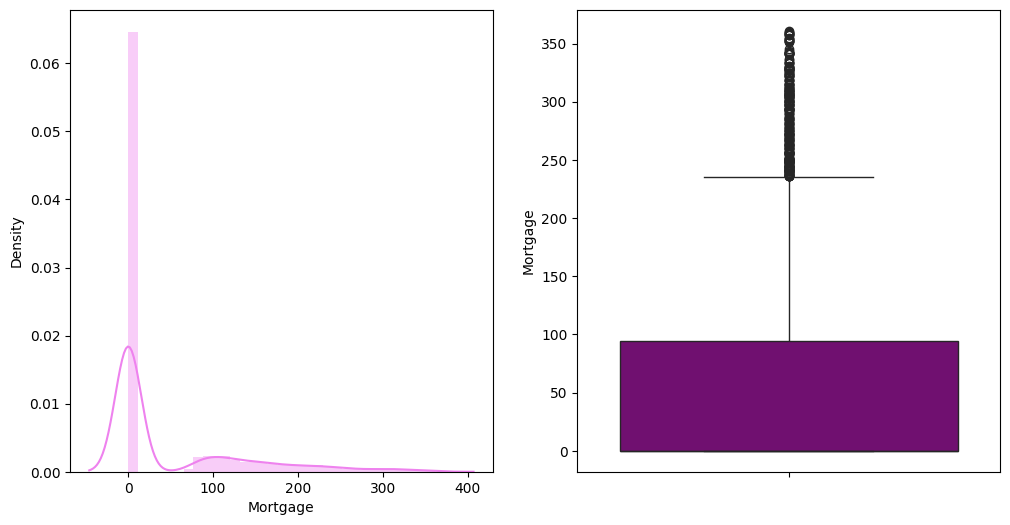

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
sns.distplot(df['Mortgage'], kde=True, ax=ax[0], color='violet')
sns.boxplot(df['Mortgage'], ax=ax[1], color='purple')

In [55]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


### BIVERIATE ANALYSIS 

In [56]:
'''Lets see what factors affect the decision of taking a personal loan'''
features = ['Age', 'Income', 'Experience', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
target = 'Personal Loan'
colors = sns.color_palette('hsv', len(features))

def purchased(df, features, target):
    fig, ax = plt.subplots(3, 4, figsize=(15,10))
    ax = ax.flatten()
    
    for index, column in enumerate(features):
        sns.barplot(x=df[target], y=df[column], ci=None, ax=ax[index], color=colors[index])
        ax[index].set_title(f'Bar plot for {column} vs {target}')
        
    for i in range(len(features), len(ax)):
        ax[i].set_visible(False)
        
    plt.tight_layout()
    plt.show()
        
    return fig


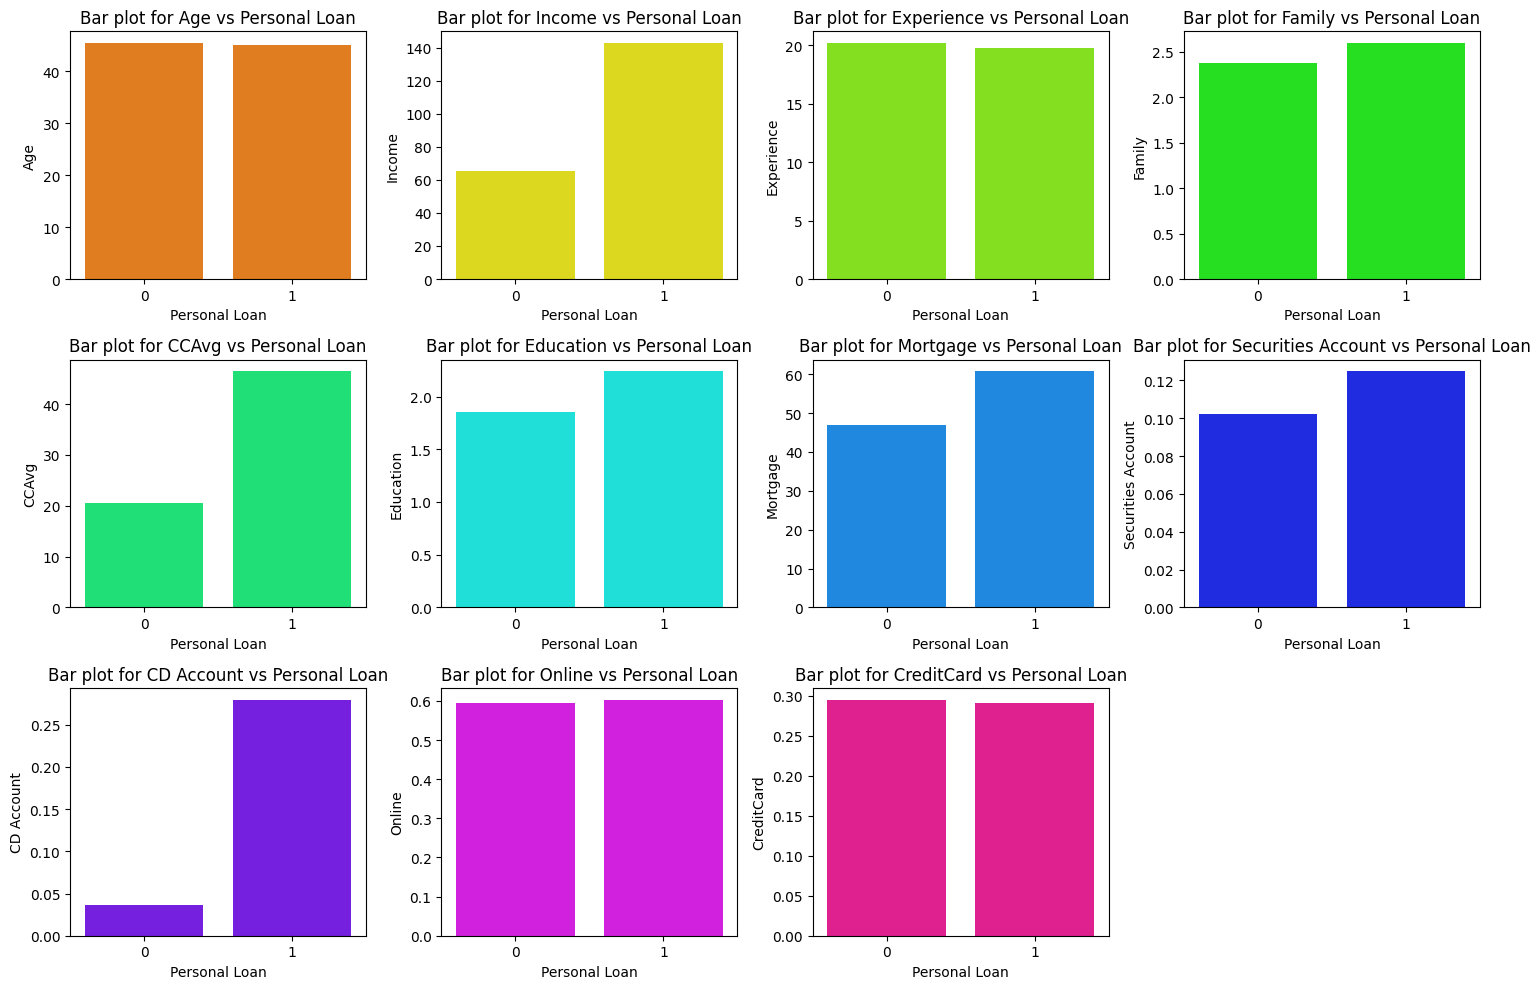

In [57]:
fig = purchased(df, features, target)

### OBSERVATIONS
1. **Age vs. Personal Loan**: The distribution of ages is somewhat similar for both groups, suggesting that age alone may not be a strong differentiator for predicting loan purchase.

2. **Income vs. Personal Loan**: There is a noticeable difference in income levels between the two groups. Customers with higher incomes seem more likely to purchase personal loans.

3. **Experience vs. Personal Loan**: Experience seems similarly distributed between the two groups, much like age, which might indicate a lower influence on the decision to purchase a personal loan.

4. **Family vs. Personal Loan**: Family size appears similar for both groups, suggesting it may not be a strong indicator of whether someone will purchase a personal loan.

5. **CCAvg vs. Personal Loan**: There is a visible difference, with those purchasing personal loans having a higher average credit card spending (CCAvg). This might indicate that higher credit card usage correlates with a higher likelihood of purchasing a loan.

6. **Education vs. Personal Loan**: Education seems to have an effect, with a slightly higher proportion of loans being purchased by individuals with a certain level of education.

7. **Mortgage vs. Personal Loan**: It appears that individuals with higher mortgage values are more likely to have purchased personal loans.

8. **Securities Account vs. Personal Loan**: The proportion of individuals with securities accounts purchasing loans is higher compared to those without, but the overall numbers are small.

9. **CD Account vs. Personal Loan**: A higher proportion of individuals with CD (Certificate of Deposit) accounts have purchased personal loans. This suggests a potential correlation between having a CD account and the purchase of personal loans.

10. **Online vs. Personal Loan**: Usage of online services is roughly similar for both groups, indicating that online engagement might not be a strong predictor of personal loan purchases.

11. **CreditCard vs. Personal Loan**: Credit card ownership seems relatively uniform across those who did and did not purchase a personal loan, suggesting it might not be a major deciding factor.

Overall, certain financial-related features like income, average credit card spending, and having a CD account seem to be associated with a higher likelihood of purchasing a personal loan. In contrast, features like age, family size, and online engagement do not show a strong differentiation between the two groups.

In [58]:
'''Correlation between features'''
corr = df.corr()

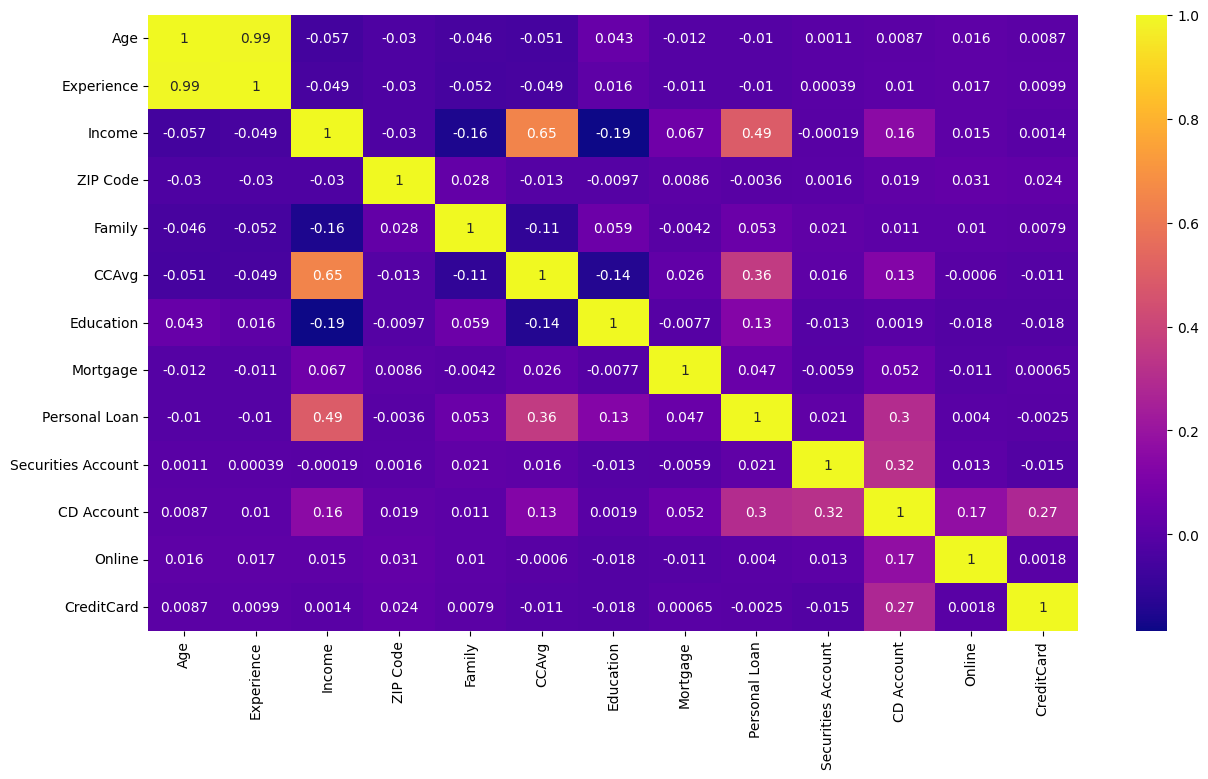

In [59]:
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap='plasma', annot=True)
plt.show()

### OBSERVATION
1. Age and experience are highly correlated hence to avoid multicollinearity we drop Experience as it is not making any relevent contributions


In [60]:
df = df.drop(columns=['Experience', 'ZIP Code'], axis=1)

### IMBALANCED TARGET FEATURE

In [61]:
X = df.drop(columns='Personal Loan')
y = df['Personal Loan']

In [62]:
y.value_counts()

Personal Loan
0    4461
1     433
Name: count, dtype: int64

In [63]:
'''Splitting the data into train and test toavoud data leakage and save the imbalanced test data for prediction'''
from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
'''Lets use oversampling technique to balance the classes'''
from imblearn.over_sampling import SMOTEN

smote = SMOTEN(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(x_train, Y_train)

In [65]:
y_resampled.value_counts()

Personal Loan
0    3567
1    3567
Name: count, dtype: int64

In [66]:
X_resampled

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,65,141,2,82.80,1,0,1,0,1,0
1,60,28,1,18.00,3,124,1,0,1,0
2,61,23,3,4.80,2,0,0,0,0,0
3,45,40,3,7.20,2,0,0,0,1,1
4,36,40,2,20.04,2,129,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7129,33,184,2,50.40,2,0,0,0,0,0
7130,27,164,2,51.60,3,0,0,0,0,0
7131,28,129,4,50.40,3,0,0,0,0,0
7132,28,103,4,50.40,2,0,0,0,1,0


### FEATURE SELECTION AND BASELINE MODEL SELECTION

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


'''RFE'''
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

rfe = RFE(estimator, n_features_to_select=X_resampled.shape[1], step=1)
label = rfe.fit(X_resampled, y_resampled)

selected_features = X_resampled.columns[label.support_]
selected_coeff = label.estimator_.feature_importances_

fi_rfe = pd.DataFrame({
    "features":X_resampled.columns,
    "rfe_importance":selected_coeff
}).sort_values("rfe_importance", ascending=False)


'''RandomForest'''
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_resampled, y_resampled)

fi_rf = pd.DataFrame({
    "features":X_resampled.columns,
    "rf_importance":rf.feature_importances_
}).sort_values('rf_importance', ascending=False)


'''Permutation Importance'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# CALCULATING PERMUTATION IMPORTANCE
permutation_imp = permutation_importance(xgb, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1)

fi_pi = pd.DataFrame({
    "features":X_resampled.columns,
    "pi_importance":permutation_imp.importances_mean
}).sort_values("pi_importance", ascending=False)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)


'''LASSO'''
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso.fit(X_train, y_train)

fi_ls = pd.DataFrame({
    'features': X_train.columns,
    'lasso_coeff': abs(lasso.coef_.flatten())
}).sort_values(by='lasso_coeff', ascending=False)


'''Gradient Boost'''
gbr = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbr.fit(X_resampled, y_resampled)

fi_gbr = pd.DataFrame({
    "features":X_resampled.columns,
    "gbr_importance":gbr.feature_importances_
}).sort_values("gbr_importance", ascending=False)

In [68]:
final_df = fi_rfe.merge(fi_rf, on='features').merge(fi_pi, on='features').merge(fi_ls, on='features').merge(fi_gbr, on='features').set_index('features')

In [69]:
final_df

,rfe_importance,rf_importance,pi_importance,lasso_coeff,gbr_importance
features,,,,,
Income,0.443744,0.443744,0.307751,0.040907,0.605857
CCAvg,0.196771,0.196771,0.085662,0.010432,0.121594
Education,0.107661,0.107661,0.119215,0.901040,0.115033
Age,0.094857,0.094857,0.019033,0.078888,0.019746
Family,0.055638,0.055638,0.055277,0.073910,0.118113
CD Account,0.054947,0.054947,0.025116,4.057567,0.012402
Mortgage,0.018802,0.018802,0.000126,0.003204,0.004711
CreditCard,0.013889,0.013889,-0.000434,1.691388,0.001485
Online,0.008377,0.008377,-0.000028,0.823195,0.000727


In [70]:
final_df['Average_importance'] = final_df.iloc[:, 0:].mean(axis=1)

In [71]:
final_df.sort_values(by='Average_importance', ascending=False)

,rfe_importance,rf_importance,pi_importance,lasso_coeff,gbr_importance,Average_importance
features,,,,,,
CD Account,0.054947,0.054947,0.025116,4.057567,0.012402,0.840996
Income,0.443744,0.443744,0.307751,0.040907,0.605857,0.368400
CreditCard,0.013889,0.013889,-0.000434,1.691388,0.001485,0.344043
Securities Account,0.005315,0.005315,-0.000140,1.412586,0.000332,0.284681
Education,0.107661,0.107661,0.119215,0.901040,0.115033,0.270122
Online,0.008377,0.008377,-0.000028,0.823195,0.000727,0.168130
CCAvg,0.196771,0.196771,0.085662,0.010432,0.121594,0.122246
Family,0.055638,0.055638,0.055277,0.073910,0.118113,0.071715
Age,0.094857,0.094857,0.019033,0.078888,0.019746,0.061476


### BUILDING A BASELINE MODEL

Lets build a model with all the features and then compare it with a model which contains only important features to see if there is any change in model metrics.

1. All features included

In [72]:
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold


model_dict = {
    'logistic_reg':LogisticRegression(),
    'svr':SVC(),
    'decision tree': DecisionTreeClassifier(),
    'random forest':RandomForestClassifier(),
    'extra trees': ExtraTreeClassifier(),
    'gradient boosting': GradientBoostingClassifier(),
    'adaboost': AdaBoostClassifier(),
    'xgboost':XGBClassifier()
}

In [73]:
def model_builder(model_name, model):
    output = []
    output.append(model_name)
    X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
    
    scaled_xtrain = scaler.fit_transform(X_train_resampled)
    scaled_xtest = scaler.transform(X_test_resampled)
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    score_F1 = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='f1').mean()
    output.append(score_F1)
    
    model.fit(scaled_xtrain, y_train_resampled)
    prediction = model.predict(scaled_xtest)
    
    recall = recall_score(y_test_resampled, prediction)
    precision = precision_score(y_test_resampled, prediction)
    roc_auc = roc_auc_score(y_test_resampled, prediction)
    
    output.append(recall)
    output.append(precision)
    output.append(roc_auc)
    
    return output

In [74]:
final_output = []
for name, model in model_dict.items():
    final_output.append(model_builder(name, model))

In [75]:
model_score_df = pd.DataFrame(final_output, columns=['Model', 'F1', 'Recall', 'Precision', 'ROC-AUC'])

In [76]:
model_score_df

,Model,F1,Recall,Precision,ROC-AUC
0,logistic_reg,0.911312,0.920937,0.874826,0.899985
1,svr,0.892268,0.980966,0.959885,0.971666
2,decision tree,0.990645,0.991215,0.985444,0.988887
3,random forest,0.993580,0.997072,0.994161,0.995848
4,extra trees,0.974355,0.979502,0.946252,0.964213
5,gradient boosting,0.987596,0.995608,0.982659,0.989739
6,adaboost,0.964507,0.983895,0.942496,0.964394
7,xgboost,0.993007,0.998536,0.991279,0.995236


2. Removing the less important features

In [77]:
final_df[['Average_importance']].sort_values(by='Average_importance',ascending=False)

,Average_importance
features,
CD Account,0.840996
Income,0.368400
CreditCard,0.344043
Securities Account,0.284681
Education,0.270122
Online,0.168130
CCAvg,0.122246
Family,0.071715
Age,0.061476


In [78]:
sample_df = X_resampled.copy()

In [79]:
sample_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,65,141,2,82.80,1,0,1,0,1,0
1,60,28,1,18.00,3,124,1,0,1,0
2,61,23,3,4.80,2,0,0,0,0,0
3,45,40,3,7.20,2,0,0,0,1,1
4,36,40,2,20.04,2,129,1,0,1,0


In [80]:
print(f'Shape of df before dropping columns: {sample_df.shape}')
sample_df.drop(columns=['Mortgage', 'CreditCard', 'Online', 'Securities Account'], inplace=True)
print(f'Shape of df after dropping columns: {sample_df.shape}')

Shape of df before dropping columns: (7134, 10)
Shape of df after dropping columns: (7134, 6)


In [81]:
def sample_model_builder(model_name, model):
    output = []
    output.append(model_name)
    X_train_resampled1, X_test_resampled1, y_train_resampled1, y_test_resampled1 = train_test_split(sample_df, y_resampled, test_size=0.2, random_state=42)
    
    scaled_xtrain1 = scaler.fit_transform(X_train_resampled1)
    scaled_xtest1 = scaler.transform(X_test_resampled1)
    
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    score_F1 = cross_val_score(model, sample_df, y_resampled, cv=kfold, scoring='f1').mean()
    output.append(score_F1)
    
    model.fit(scaled_xtrain1, y_train_resampled1)
    prediction = model.predict(scaled_xtest1)
    
    recall = recall_score(y_test_resampled1, prediction)
    precision = precision_score(y_test_resampled1, prediction)
    roc_auc = roc_auc_score(y_test_resampled1, prediction)
    
    output.append(recall)
    output.append(precision)
    output.append(roc_auc)
    
    return output

sample_df_output = []
for name, model in model_dict.items():
    sample_df_output.append(sample_model_builder(name, model))

sample_df_scores = pd.DataFrame(sample_df_output, columns=['Model', 'F1', 'Recall', 'Precision', 'ROC-AUC'])

In [82]:
sample_df_scores

,Model,F1,Recall,Precision,ROC-AUC
0,logistic_reg,0.885723,0.906296,0.846785,0.877879
1,svr,0.894722,0.983895,0.960000,0.973130
2,decision tree,0.992423,0.994143,0.994143,0.994384
3,random forest,0.995250,0.998536,0.997076,0.997924
4,extra trees,0.983741,0.988287,0.979681,0.984735
5,gradient boosting,0.987713,0.992679,0.979769,0.986931
6,adaboost,0.957278,0.982430,0.945070,0.965006
7,xgboost,0.994028,0.998536,0.998536,0.998596


There is a slight increase in the score. So we go ahead an drop the columns for our final model.

### FINAL MODEL WITH HYPER PARAMETER TUNING 

In [83]:
x_test.drop(columns=['Mortgage', 'Securities Account', 'Online', 'CreditCard'], inplace=True)

In [84]:
final_X_train, final_X_test, final_y_train, final_y_test = train_test_split(sample_df, y_resampled, test_size=0.33, random_state=42)

In [85]:
scaled_final_xtrain = scaler.fit_transform(final_X_train)
scaled_final_xtest = scaler.transform(final_X_test)

In [86]:
scaled_orig_xtest = scaler.transform(x_test)

In [87]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK, space_eval

xgb_space = {
    'n_estimators': hp.choice('xgb_n_estimators', [100, 200, 300, 500, 650]),
    'max_depth': hp.choice('xgb_max_depth', [3, 4, 5, 6, 10]),
    'learning_rate': hp.uniform('xgb_learning_rate', 0.01, 0.3),
    'subsample': hp.uniform('xgb_subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.choice('min_child_weight', [1, 5, 10]),
    'gamma': hp.uniform('gamma', 0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0.1, 1),
}

def objective(parameters):
    xgb.set_params(**parameters)
    score = cross_val_score(xgb, scaled_final_xtrain, final_y_train, cv=10, scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()    
best_space = fmin(fn=objective,
                  algo=tpe.suggest,
                  space=xgb_space,
                  trials=trials,
                  max_evals=100)
    

100%|██████████| 100/100 [00:16<00:00,  6.21trial/s, best loss: -0.9995428652417033]


In [88]:
best_params = space_eval(xgb_space, best_space)
print(f'Best parameters are: {best_params}')

Best parameters are: {'colsample_bytree': 0.6599533138145903, 'gamma': 0.1661481803475223, 'learning_rate': 0.04152595823953524, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.11249272451817732, 'reg_lambda': 0.48338081237667074, 'subsample': 0.939298809578192}


In [89]:
'''Running the final model with best parameters'''
from sklearn. metrics import confusion_matrix
xgc = XGBClassifier(**best_params)

xgc.fit(scaled_final_xtrain, final_y_train)
prediction_resampled = xgc.predict(scaled_final_xtest)

print(f'Recall is {recall_score(final_y_test, prediction_resampled)}')
print(f'Precision is {precision_score(final_y_test, prediction_resampled)}')
print(f'ROC_AUC is {roc_auc_score(final_y_test, prediction_resampled)}')

Recall is 1.0
Precision is 0.996548748921484
ROC_AUC is 0.9983333333333334


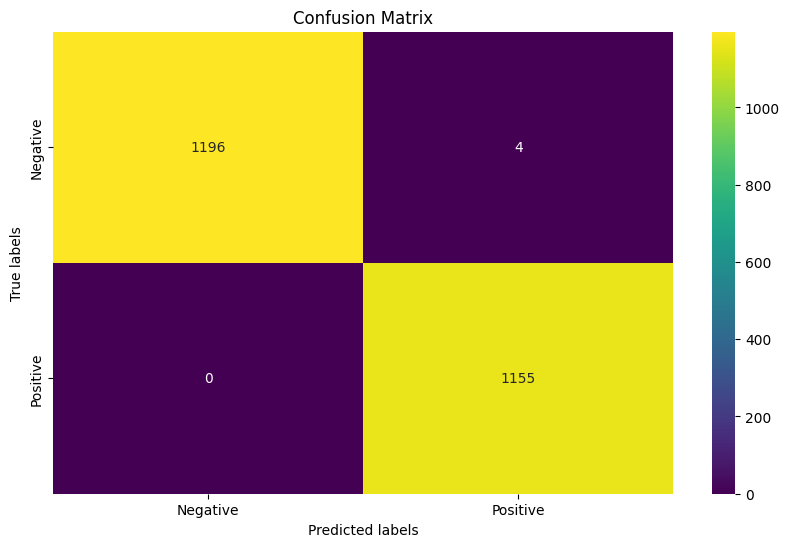

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix(final_y_test, prediction_resampled), annot=True, fmt='d', ax=ax, cmap='viridis') 


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

plt.show()

In [91]:
'''Prediction on actual imbalanced test sample'''
Y_test.value_counts()

Personal Loan
0    894
1     85
Name: count, dtype: int64

In [92]:
prediction_imbalanced = xgc.predict(scaled_orig_xtest)

print(f'Recall is {recall_score(Y_test, prediction_imbalanced)}')
print(f'Precision is {precision_score(Y_test, prediction_imbalanced)}')
print(f'ROC_AUC is {roc_auc_score(Y_test, prediction_imbalanced)}')

Recall is 0.9058823529411765
Precision is 0.9390243902439024
ROC_AUC is 0.9501447558889327


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

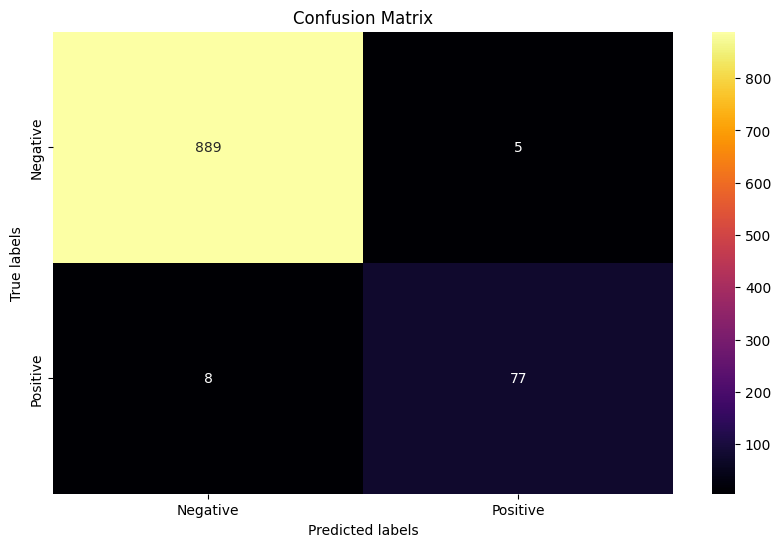

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, prediction_imbalanced), annot=True, fmt='d', ax=ax, cmap='inferno') 


ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])